In [68]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
import numpy as np

from scipy.stats import sem

wine_file = "Resources/clean_winemag_data.csv"

In [69]:
# Create dataframe
wine_df =pd.read_csv(wine_file, index_col=0)

wine_df.head()

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Avidagos,NaN,Douro,Portugal,15.0,87.0,Roger Voss,@vossroger,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,Willamette Valley,Oregon,US,14.0,87.0,Paul Gregutt,@paulgwine,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Reserve Late Harvest,Lake Michigan Shore,Michigan,US,13.0,87.0,Alexander Peartree,NaN,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Vintner's Reserve Wild Child Block,Willamette Valley,Oregon,US,65.0,87.0,Paul Gregutt,@paulgwine,"Much like the regular bottling from 2012, this..."
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Ars In Vitro,Navarra,Northern Spain,Spain,15.0,87.0,Michael Schachner,@wineschach,Blackberry and raspberry aromas show a typical...


## Examine number of ratings per wine variety.

In [70]:
# Count unique wine types
unique_wine_types = wine_df['Type'].unique()
# unique_wine_types

count_unique_wine_types = len(unique_wine_types)
count_unique_wine_types

691

In [71]:
# Use groupby and summary statistical methods to calculate the following properties of each wine type: 
# mean, median, variance, standard deviation, and SEM of the rating. 

mean_wine_rating = wine_df.groupby(['Type'])['Rating'].mean()
median_wine_rating = wine_df.groupby(['Type'])['Rating'].median()
var_wine_rating = wine_df.groupby(['Type'])['Rating'].var()
sd_wine_rating = wine_df.groupby(['Type'])['Rating'].std()
sem_wine_rating = wine_df.groupby(['Type'])['Rating'].sem()
count_wine_rating = wine_df.groupby(['Type'])['Rating'].count()

wine_type_df = pd.DataFrame({
    'Number of Ratings': count_wine_rating,
    'Mean Wine Rating': mean_wine_rating,
    'Median Wine Rating': median_wine_rating,
    'Wine Rating Variance': var_wine_rating,
    'Wine Rating St. Dev.': sd_wine_rating,
    'Wine Rating St. Error': sem_wine_rating
})

wine_type_df

,Number of Ratings,Mean Wine Rating,Median Wine Rating,Wine Rating Variance,Wine Rating St. Dev.,Wine Rating St. Error
Type,,,,,,
Abouriou,3,87.666667,87.0,9.333333,3.055050,1.763834
Agiorgitiko,63,87.031746,87.0,3.966718,1.991662,0.250926
Aglianico,294,89.397959,89.0,6.636310,2.576104,0.150241
Aidani,1,82.000000,82.0,NaN,NaN,NaN
Airen,3,81.666667,82.0,2.333333,1.527525,0.881917
...,...,...,...,...,...,...
Zinfandel,2708,87.826809,88.0,9.669661,3.109608,0.059756
Zlahtina,2,86.000000,86.0,8.000000,2.828427,2.000000
Zweigelt,182,88.500000,89.0,4.693370,2.166419,0.160586


In [72]:
# Sort descending by Number of Ratings
wine_type_df = wine_type_df.sort_values('Number of Ratings', ascending=False).reset_index()

wine_type_df.head(15)

,Type,Number of Ratings,Mean Wine Rating,Median Wine Rating,Wine Rating Variance,Wine Rating St. Dev.,Wine Rating St. Error
0,Pinot Noir,12785,89.409230,90.0,9.807800,3.131741,0.027697
1,Chardonnay,11077,88.302880,88.0,10.464864,3.234944,0.030737
2,Cabernet Sauvignon,9384,88.610294,88.0,11.035260,3.321936,0.034292
3,Red Blend,8466,88.379754,88.0,7.849745,2.801740,0.030450
4,Bordeaux-style Red Blend,5340,88.792135,89.0,9.456690,3.075173,0.042082
5,Riesling,4971,89.439147,89.0,8.154596,2.855625,0.040502
6,Sauvignon Blanc,4780,87.406904,87.0,7.185096,2.680503,0.038771
7,Syrah,4086,89.290749,90.0,9.283376,3.046863,0.047665
8,Rosé,3261,86.885925,87.0,6.455694,2.540806,0.044493
9,Merlot,3061,87.199935,87.0,8.811647,2.968442,0.053653


In [73]:
# Create new DataFrame of top 15 wine types with most number of ratings
wine_type_ratings_df = wine_type_df.head(15)

# Add column of wine color
list_of_wine_colors = ["Red","White","White","Red","Red","White","White","Red","Pink","Red","Red","Red","Red","Red","Red"]
wine_type_ratings_df['Color'] = list_of_wine_colors

# Move Color column after Type
# wine_type_ratings_df.columns to easily get column names to copy/paste
wine_type_ratings_df = wine_type_ratings_df[['Type','Color','Number of Ratings','Mean Wine Rating','Median Wine Rating','Wine Rating Variance','Wine Rating St. Dev.','Wine Rating St. Error']]
wine_type_ratings_df

C:\Users\User\AppData\Local\Temp\ipykernel_15484\1059938743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_type_ratings_df['Color'] = list_of_wine_colors


,Type,Color,Number of Ratings,Mean Wine Rating,Median Wine Rating,Wine Rating Variance,Wine Rating St. Dev.,Wine Rating St. Error
0,Pinot Noir,Red,12785,89.409230,90.0,9.807800,3.131741,0.027697
1,Chardonnay,White,11077,88.302880,88.0,10.464864,3.234944,0.030737
2,Cabernet Sauvignon,White,9384,88.610294,88.0,11.035260,3.321936,0.034292
3,Red Blend,Red,8466,88.379754,88.0,7.849745,2.801740,0.030450
4,Bordeaux-style Red Blend,Red,5340,88.792135,89.0,9.456690,3.075173,0.042082
5,Riesling,White,4971,89.439147,89.0,8.154596,2.855625,0.040502
6,Sauvignon Blanc,White,4780,87.406904,87.0,7.185096,2.680503,0.038771
7,Syrah,Red,4086,89.290749,90.0,9.283376,3.046863,0.047665
8,Rosé,Pink,3261,86.885925,87.0,6.455694,2.540806,0.044493
9,Merlot,Red,3061,87.199935,87.0,8.811647,2.968442,0.053653


C:\Users\User\AppData\Local\Temp\ipykernel_15484\100763445.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
C:\Users\User\AppData\Local\Temp\ipykernel_15484\100763445.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
C:\Users\User\AppData\Local\Temp\ipykernel_15484\100763445.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  pink_patch = mpatches.Patch(color='pink', edgecolor='black', label="Pink")


Text(0, 0.5, '# of Ratings')

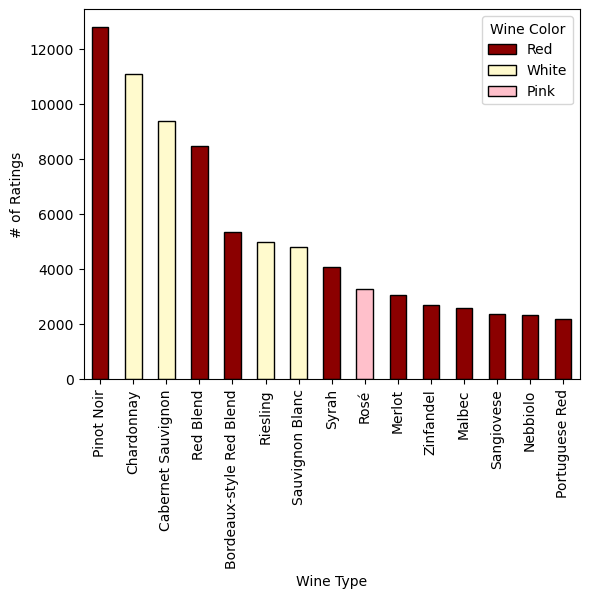

In [82]:
# Plot bar chart of top 15 wine types with most number of ratings

# Set bar colors based on wine color
wine_colors = wine_type_ratings_df['Color']
wine_chart_colors = [{c=="Red":'darkred',c=="White":'lemonchiffon',c=="Pink":'pink'}[True] for c in wine_colors]

# Bar chart setup
wine_type_bar_chart = wine_type_ratings_df.plot.bar(x='Type', y='Number of Ratings', rot=90, color=wine_chart_colors, edgecolor='black')

# Set legend based on wine color using mpatches
red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
pink_patch = mpatches.Patch(color='pink', edgecolor='black', label="Pink")
handles = [red_patch, white_patch, pink_patch]

for i, handle in enumerate(handles):
    handle.set_edgecolor('black')

# Plot bar chart
plt.legend(
    title = "Wine Color",
    handles = handles, 
    loc = 'best'
)

plt.xlabel("Wine Type")
plt.ylabel("# of Ratings")

# # Save chart to .png file
# plt.savefig('wine_type_bar_chart')

# Is there a pattern in reviewers' average/median wine ratings?

In [75]:
# Count unique sommeliers
unique_soms = wine_df['Sommelier'].unique()
# unique_soms

count_unique_soms = len(unique_soms)
count_unique_soms

20

In [84]:
# Use groupby and summary statistical methods to calculate the following properties of each sommelier rating: 
# mean, median, variance, standard deviation, and SEM of the rating. 

count_som_rating = wine_df.groupby(['Sommelier'])['Rating'].count()
mean_som_rating = wine_df.groupby(['Sommelier'])['Rating'].mean()
median_som_rating = wine_df.groupby(['Sommelier'])['Rating'].median()
highest_som_rating = wine_df.groupby(['Sommelier'])['Rating'].max()
lowest_som_rating = wine_df.groupby(['Sommelier'])['Rating'].min()
mean_som_price = wine_df.groupby(['Sommelier'])['Price'].mean()
median_som_price = wine_df.groupby(['Sommelier'])['Price'].median()
highest_som_price = wine_df.groupby(['Sommelier'])['Price'].max()
lowest_som_price = wine_df.groupby(['Sommelier'])['Price'].min()


som_df = pd.DataFrame({
    'Number of Ratings': count_som_rating,
    'Mean Wine Rating': mean_som_rating,
    'Median Wine Rating': median_som_rating,
    'Highest Wine Rating': highest_som_rating,
    'Lowest Wine Rating': lowest_som_rating,
    'Mean Wine Price': mean_som_price,
    'Median Wine Price': median_som_price,
    'Highest Wine Price': highest_som_price,
    'Lowest Wine Price': lowest_som_price
}).reset_index()

som_df

,Sommelier,Number of Ratings,Mean Wine Rating,Median Wine Rating,Highest Wine Rating,Lowest Wine Rating,Mean Wine Price,Median Wine Price,Highest Wine Price,Lowest Wine Price
0,Alexander Peartree,413,85.854722,86.0,91.0,80.0,29.053269,25.0,250.0,11.0
1,Anna Lee C. Iijima,4369,88.405127,88.0,98.0,80.0,29.790112,22.0,775.0,4.0
2,Anne Krebiehl MW,3389,90.612570,90.0,97.0,80.0,31.244910,25.0,1100.0,10.0
3,Carrie Dykes,138,86.384058,87.0,92.0,81.0,30.753623,28.0,75.0,14.0
4,Christina Pickard,6,87.833333,88.0,93.0,82.0,29.333333,28.5,50.0,19.0
5,Fiona Adams,27,86.888889,87.0,91.0,82.0,31.148148,27.0,80.0,17.0
6,Jeff Jenssen,469,88.328358,89.0,97.0,82.0,22.313433,16.0,320.0,6.0
7,Jim Gordon,4171,88.625989,89.0,97.0,80.0,26.935507,23.0,220.0,4.0
8,Joe Czerwinski,5010,88.540519,89.0,100.0,80.0,35.182036,22.0,850.0,5.0
9,Kerin O’Keefe,9874,88.908750,89.0,100.0,80.0,41.953413,30.0,800.0,6.0


Text(0, 0.5, 'Wine Rating Score (out of 100)')

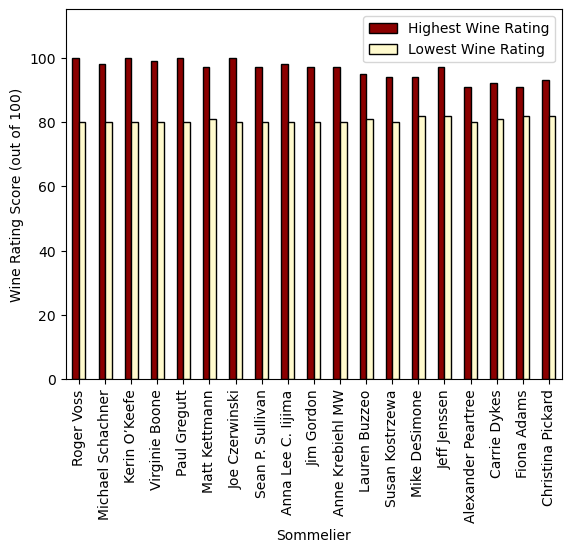

In [91]:
# Show bar graph of highest and lowest wine ratings by sommelier, sorted by number of ratings
sorted_som_df = som_df.sort_values('Number of Ratings', ascending=False)

# Set bar colors based on wine color
som_ratings_colors = ['darkred', 'lemonchiffon']

# Bar chart setup
som_ratings_bar_chart = sorted_som_df.plot.bar(x='Sommelier', y=['Highest Wine Rating', 'Lowest Wine Rating'], rot=90, color=som_ratings_colors, edgecolor='black')

plt.ylim(0, 115)
plt.xlabel("Sommelier")
plt.ylabel("Wine Rating Score (out of 100)")

# # Save chart to .png file
# plt.savefig('som_ratings_bar_chart')

Text(0, 0.5, 'Wine Price')

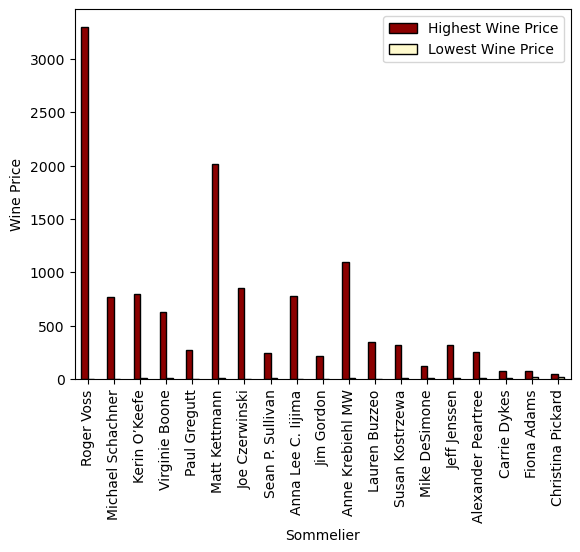

In [93]:
# Show bar graph of highest and lowest wine prices by sommelier, sorted by number of ratings

# Set bar colors based on wine color
som_ratings_colors = ['darkred', 'lemonchiffon']

# Bar chart setup
som_prices_bar_chart = sorted_som_df.plot.bar(x='Sommelier', y=['Highest Wine Price', 'Lowest Wine Price'], rot=90, color=som_ratings_colors, edgecolor='black')

plt.xlabel("Sommelier")
plt.ylabel("Wine Price")

# # Save chart to .png file
# plt.savefig('som_price_bar_chart')

The correlation between number of ratings and the average wine rating is 0.28.


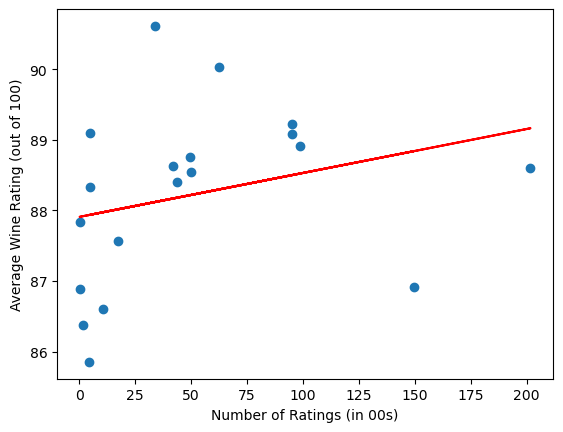

In [77]:
# Show correlation between Number of Ratings and Average Wine Rating 
x_axis = som_df['Number of Ratings'] / 100
y_axis = som_df['Mean Wine Rating']

correlation = st.pearsonr(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.xlabel("Number of Ratings (in 00s)")
plt.ylabel("Average Wine Rating (out of 100)")
plt.plot(x_axis,regress_values,"r-")
print(f"The correlation between number of ratings and the average wine rating is {round(correlation[0], 2)}.")
plt.show()

The correlation between number of ratings and the average wine price is 0.51.


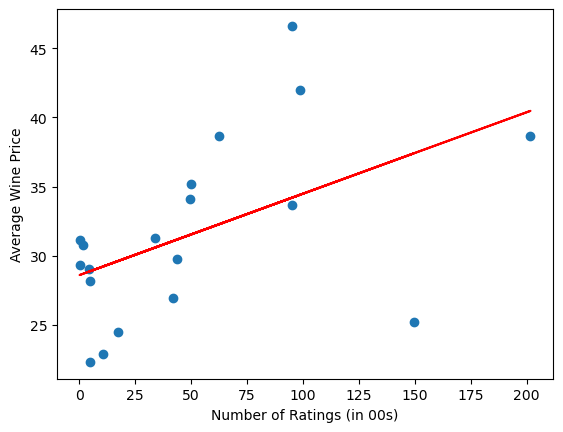

In [78]:
# Show correlation between Number of Ratings and Average Wine Price 
x_axis = som_df['Number of Ratings'] / 100
y_axis = som_df['Mean Wine Price']

correlation = st.pearsonr(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.xlabel("Number of Ratings (in 00s)")
plt.ylabel("Average Wine Price")
plt.plot(x_axis,regress_values,"r-")
print(f"The correlation between number of ratings and the average wine price is {round(correlation[0], 2)}.")
plt.show()

In [79]:
# Create DataFrame only of sommeliers' names and Twitter handles (to be merged with som_df later)
som_twitter_df = wine_df[['Sommelier','Sommelier Twitter Handle']].copy()
som_twitter_df = som_twitter_df.sort_values('Sommelier', ascending=True)
som_twitter_df = som_twitter_df.drop_duplicates(subset='Sommelier', keep="first").reset_index()
som_twitter_df = som_twitter_df.drop(som_twitter_df.columns[0], axis=1)
som_twitter_df = som_twitter_df.fillna('N/A')

som_twitter_df

,Sommelier,Sommelier Twitter Handle
0,Alexander Peartree,N/A
1,Anna Lee C. Iijima,N/A
2,Anne Krebiehl MW,@AnneInVino
3,Carrie Dykes,N/A
4,Christina Pickard,@winewchristina
5,Fiona Adams,@bkfiona
6,Jeff Jenssen,@worldwineguys
7,Jim Gordon,@gordone_cellars
8,Joe Czerwinski,@JoeCz
9,Kerin O’Keefe,@kerinokeefe


In [80]:
# Merge som_df and som_twitter_df
som_twitter_df = pd.merge(som_df, som_twitter_df, on='Sommelier', how="inner")
som_twitter_df

,Sommelier,Number of Ratings,Mean Wine Rating,Median Wine Rating,Highest Wine Rating,Lowest Wine Rating,Mean Wine Price,Median Wine Price,Highest Wine Price,Lowest Wine Price,Sommelier Twitter Handle
0,Alexander Peartree,413,85.854722,86.0,91.0,80.0,29.053269,25.0,250.0,11.0,N/A
1,Anna Lee C. Iijima,4369,88.405127,88.0,98.0,80.0,29.790112,22.0,775.0,4.0,N/A
2,Anne Krebiehl MW,3389,90.612570,90.0,97.0,80.0,31.244910,25.0,1100.0,10.0,@AnneInVino
3,Carrie Dykes,138,86.384058,87.0,92.0,81.0,30.753623,28.0,75.0,14.0,N/A
4,Christina Pickard,6,87.833333,88.0,93.0,82.0,29.333333,28.5,50.0,19.0,@winewchristina
5,Fiona Adams,27,86.888889,87.0,91.0,82.0,31.148148,27.0,80.0,17.0,@bkfiona
6,Jeff Jenssen,469,88.328358,89.0,97.0,82.0,22.313433,16.0,320.0,6.0,@worldwineguys
7,Jim Gordon,4171,88.625989,89.0,97.0,80.0,26.935507,23.0,220.0,4.0,@gordone_cellars
8,Joe Czerwinski,5010,88.540519,89.0,100.0,80.0,35.182036,22.0,850.0,5.0,@JoeCz
9,Kerin O’Keefe,9874,88.908750,89.0,100.0,80.0,41.953413,30.0,800.0,6.0,@kerinokeefe
